In [4]:
import numpy as np
import pandas as pd
import sklearn.ensemble
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
import bamboolib

In [6]:
features_train = pd.read_csv('train_final.csv')
features_test = pd.read_csv('test_final.csv')
features_test["BsmtFullBath"].fillna(0, inplace = True)
features_test["BsmtHalfBath"].fillna(0, inplace = True)

In [7]:
labels_train = np.array(features_train['SalePrice'])
labels_test = np.array(features_test['SalePrice'])

In [8]:
features_train = features_train.drop('SalePrice', axis = 1)
features_test = features_test.drop('SalePrice', axis = 1)

In [31]:
features_train["house_age"] = features_train['YrSold'] - features_train['YearBuilt']
features_test["house_age"] = features_test['YrSold'] - features_test['YearBuilt']

In [33]:
features_train = features_train.drop('YrSold', axis = 1)
features_test = features_test.drop('YrSold', axis = 1)
features_train = features_train.drop('YearBuilt', axis = 1)
features_test = features_test.drop('YearBuilt', axis = 1)

In [34]:
gbm = GradientBoostingRegressor()

In [35]:
gbm.set_params(verbose=1)

GradientBoostingRegressor(verbose=1)

In [36]:
gbm.fit(features_train,labels_train)

      Iter       Train Loss   Remaining Time 
         1  4297802070.6113            1.50s
         2  3705255341.9370            1.47s
         3  3217910822.1720            1.45s
         4  2812695410.0985            1.45s
         5  2463275490.7506            1.46s
         6  2168339061.2339            1.42s
         7  1921710059.3610            1.39s
         8  1707270125.2779            1.40s
         9  1532867905.2093            1.42s
        10  1367589511.3542            1.46s
        20   576416112.7990            1.27s
        30   357225164.1920            1.05s
        40   270644752.5639            0.88s
        50   227340453.3687            0.73s
        60   200145547.3212            0.59s
        70   181893919.2660            0.43s
        80   167413057.4446            0.29s
        90   155148959.8855            0.14s
       100   144148527.3198            0.00s


GradientBoostingRegressor(verbose=1)

In [37]:
print('The train R^2 is %.3f' %(gbm.score(features_train,labels_train)))

The train R^2 is 0.971


In [38]:
print('The test R^2 is %.3f' %(gbm.score(features_test,labels_test)))

The test R^2 is 0.925


In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
def tune_gbm(learning_rate, max_depth):
    gbm = GradientBoostingRegressor(
        learning_rate=learning_rate, n_estimators=10000, max_depth=max_depth)
    gbm.fit(features_train,labels_train)
    
    return gbm


def demo_gbm_tuning(model, start=0, end=10000, training_curve=True):
    gen_train = model.staged_predict(features_train)
    gen_test  = model.staged_predict(features_test)

    trainMSE = []
    testMSE  = []
    steps   = range(1,10001)
    for n in steps:
        y_pred_train = next(gen_train)
        y_pred_test  = next(gen_test)
        trainMSE.append(mean_squared_error(y_pred_train, labels_train))
        testMSE.append(mean_squared_error(y_pred_test, labels_test))
    
    print("The best test score is {:.2f} at the step {}".format(
        min(testMSE), np.argmin(testMSE)+1))
    print('-'*50)
    plt.plot(range(start, end), testMSE[start:end])
    if training_curve:
        plt.plot(range(start, end), trainMSE[start:end])

In [41]:
learning_rate=0.001
max_depth=4

model1 = tune_gbm(learning_rate, max_depth)

The best test score is 375333952.59 at the step 9996
--------------------------------------------------


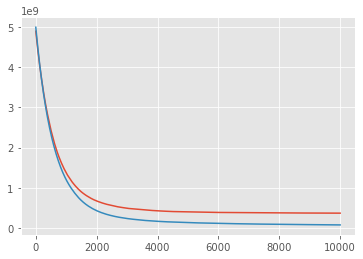

In [42]:
start = 0
end = 10000 # You may change start and end to zoom in

demo_gbm_tuning(model1, start, end)

In [43]:
from sklearn.metrics import r2_score 
n_estimators = 3000
steps = range(100, 3000, 1000)

gbm.set_params(learning_rate = 1, n_estimators=n_estimators, max_depth=3)
gbm.fit(features_train, labels_train)
gen = gbm.staged_predict(features_train)
r2_rate1 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_rate1.append(r2_score(labels_train, predicted_targets))  

      Iter       Train Loss   Remaining Time 
         1  1326192920.1633            1.72m
         2   891473556.5053            1.42m
         3   764357265.7893            1.22m
         4   661411420.6007            1.13m
         5   588849663.2858            1.07m
         6   549412359.1703            1.04m
         7   505095143.0895            1.00m
         8   461203611.6392           59.89s
         9   425863787.9017           58.61s
        10   399234432.8778           57.42s
        20   252684448.0178           50.60s
        30   182050179.0708           45.49s
        40   147343683.3690           43.47s
        50   115071950.3237           41.49s
        60    95600353.3649           40.22s
        70    74451582.5715           40.29s
        80    62878613.3541           41.22s
        90    52863925.9796           41.52s
       100    43252104.0864           40.82s
       200     8964975.5127           37.31s
       300     1736839.9104           35.98s
       40

In [44]:
gbm.set_params(learning_rate = 0.1)
gbm.fit(features_train, labels_train)
gen = gbm.staged_predict(features_train)
r2_rate01 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_rate01.append(r2_score(labels_train, predicted_targets)) 

      Iter       Train Loss   Remaining Time 
         1  4297802070.6113           47.37s
         2  3705255341.9370           46.16s
         3  3217910822.1720           43.25s
         4  2812695410.0985           41.71s
         5  2463275490.7506           41.33s
         6  2168339061.2339           42.06s
         7  1921710059.3610           41.43s
         8  1707270125.2779           40.72s
         9  1532867905.2093           40.55s
        10  1367589511.3542           40.35s
        20   576416112.7990           39.18s
        30   357225164.1920           41.62s
        40   270644752.5639           41.34s
        50   227340453.3687           40.44s
        60   200145547.3212           40.44s
        70   181893919.2660           39.62s
        80   167413057.4446           39.07s
        90   155148959.8855           38.54s
       100   144148527.3198           38.09s
       200    90201190.5261           35.07s
       300    66716411.3560           33.44s
       40

In [45]:
gbm.set_params(learning_rate = 0.01)
gbm.fit(features_train, labels_train)
gen = gbm.staged_predict(features_train)
r2_rate001 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_rate001.append(r2_score(labels_train, predicted_targets))

      Iter       Train Loss   Remaining Time 
         1  4921839992.2054           54.62s
         2  4850261946.4677           56.70s
         3  4780107906.7830           51.37s
         4  4709956238.0874           48.00s
         5  4642355502.0494           48.79s
         6  4574751302.0100           47.06s
         7  4508378028.9229           45.49s
         8  4444348415.9771           44.44s
         9  4380386843.6025           43.56s
        10  4317553934.2484           42.93s
        20  3751625952.9214           39.67s
        30  3278334318.4612           37.99s
        40  2875175366.2700           37.28s
        50  2532867070.1847           36.63s
        60  2239024136.6821           36.35s
        70  1989881777.1264           35.98s
        80  1777315717.6195           35.78s
        90  1589453248.7509           35.51s
       100  1422907734.8378           35.36s
       200   597265135.6568           34.64s
       300   362103478.9819           34.35s
       40

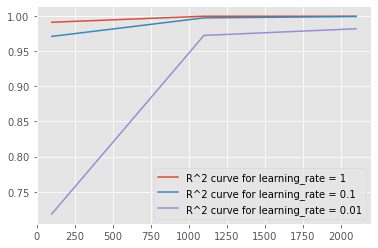

In [46]:
plt.plot(steps, r2_rate1,  label=r'R^2 curve for learning_rate = 1')
plt.plot(steps, r2_rate01, label=r'R^2 curve for learning_rate = 0.1')
plt.plot(steps, r2_rate001, label=r'R^2 curve for learning_rate = 0.01')
plt.legend(loc=4)

In [47]:
gbm.set_params(learning_rate = 0.1, max_depth = 5)
    
gbm.fit(features_train, labels_train)
gen = gbm.staged_predict(features_train)
r2_maxdepth5 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_maxdepth5.append(r2_score(labels_train, predicted_targets))     

      Iter       Train Loss   Remaining Time 
         1  4170528837.8081            1.95m
         2  3496077804.6858            2.20m
         3  2939768091.3267            2.32m
         4  2480751561.2168            2.14m
         5  2100008552.7685            1.97m
         6  1788111110.0370            1.92m
         7  1527990999.3573            1.91m
         8  1311928738.3096            1.85m
         9  1127199387.4899            1.89m
        10   974735957.5198            1.81m
        20   308161824.5468            1.43m
        30   153051315.0155            1.32m
        40   103628630.9072            1.28m
        50    81921689.9868            1.22m
        60    67895948.6073            1.22m
        70    59114471.0917            1.22m
        80    52558587.2274            1.21m
        90    47512043.0882            1.23m
       100    43517345.5388            1.26m
       200    22415689.9158            1.09m
       300    11422462.7065            1.02m
       40

In [48]:
gbm.set_params(learning_rate = 0.1, max_depth = 10)
    
gbm.fit(features_train, labels_train)
gen = gbm.staged_predict(features_train)
r2_maxdepth10 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_maxdepth10.append(r2_score(labels_train, predicted_targets)) 

      Iter       Train Loss   Remaining Time 
         1  4059463829.1032            2.46m
         2  3301142105.5904            2.22m
         3  2685574215.3418            2.18m
         4  2185201792.7649            2.29m
         5  1778313885.1212            2.41m
         6  1449415094.7082            2.47m
         7  1180883165.4830            2.46m
         8   961762067.0047            2.42m
         9   784649905.4979            2.39m
        10   639890079.9538            2.39m
        20    86436508.6366            2.25m
        30    13195815.3250            2.14m
        40     2598440.9767            2.10m
        50      762153.7116            2.12m
        60      329777.6868            2.16m
        70      178325.0056            2.12m
        80       99196.6190            2.07m
        90       60099.5621            2.04m
       100       37885.5979            2.02m
       200        2242.4235            1.85m
       300         152.5621            1.78m
       40

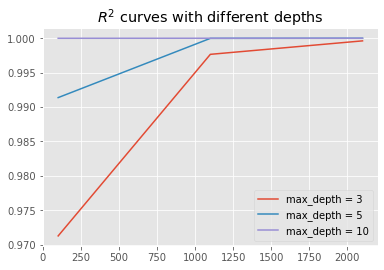

In [49]:
plt.plot(steps, r2_rate01, label='max_depth = 3')
plt.plot(steps, r2_maxdepth5, label='max_depth = 5')
plt.plot(steps, r2_maxdepth10, label='max_depth = 10')
plt.title('$R^2$ curves with different depths')
plt.legend(loc=4)

In [55]:
from sklearn.model_selection import GridSearchCV

In [104]:
def evaluate(model, features_test, labels_test):
    predictions = model.predict(features_test)
    errors = abs(predictions - labels_test)
    mape = 100 * np.mean(errors / labels_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} $.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = GradientBoostingRegressor(random_state = 42)
base_model.fit(features_train, labels_train)
base_accuracy = evaluate(base_model, features_test, labels_test)

Model Performance
Average Error: 12760.3127 $.
Accuracy = 92.42%.


In [109]:
# Create the parameter grid  
param_grid = {
    'learning_rate' : [0.05,0.1,0.15],
    'max_depth' : [5,7,9],
    'n_estimators' : [10,30,60,100],
    'min_samples_split' : [100, 150, 200],
    'min_samples_leaf' : [10,20,30]
}

grid_search = GridSearchCV(estimator = GradientBoostingRegressor(subsample=0.8,random_state=10), 
param_grid = param_grid,n_jobs=4, cv=5)                                                

In [110]:
grid_search.fit(features_train, labels_train)
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 150,
 'n_estimators': 100}

In [111]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, features_test, labels_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 12410.8714 $.
Accuracy = 92.70%.
Improvement of 0.31%.


In [115]:
# Create the parameter grid  
param_grid1 = {
    'learning_rate' : [0.09,0.1,0.11],
    'max_depth' : [9,10,11],
    'n_estimators' : [100,110,120,130],
    'min_samples_split' : [140, 150, 160],
    'min_samples_leaf' : [8,9,10]
}

grid_search = GridSearchCV(estimator = GradientBoostingRegressor(subsample=0.8,random_state=10), 
param_grid = param_grid1 ,n_jobs=4, cv=5)                                                

In [116]:
grid_search.fit(features_train, labels_train)
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 150,
 'n_estimators': 130}

In [117]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, features_test, labels_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 11860.8752 $.
Accuracy = 93.05%.
Improvement of 0.68%.


In [118]:
# Create the parameter grid  
param_grid2 = {
    'learning_rate' : [0.09,0.1,0.11],
    'max_depth' : [9,10,11],
    'n_estimators' : [100,110,120,130],
    'min_samples_split' : [145, 150, 155],
    'min_samples_leaf' : [8,7,6]
}

grid_search = GridSearchCV(estimator = GradientBoostingRegressor(subsample=0.8,random_state=10), 
param_grid = param_grid2 ,n_jobs=4, cv=5)                                                

In [119]:
grid_search.fit(features_train, labels_train)
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 9,
 'min_samples_leaf': 6,
 'min_samples_split': 155,
 'n_estimators': 130}

In [120]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, features_test, labels_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 11913.8948 $.
Accuracy = 93.00%.
Improvement of 0.63%.
